# Milestone 1: Explore Features of an Universal-Dependency dataset

## CoNLL-U Format

All Unviersal Dependency datasets are in the CoNLL-U Format (see: https://universaldependencies.org/format.html).
Each dataset consists of sentences in one language with annotated tokens.
The annotations of a token is provided in one line containing the columns ID, FORM, LEMMA, UPOS, XPOS, FEATS, HEAD, DEPREL, DEPS, MISC.

## UD_German-HDT Dataset

For milestone 1 we will explore some of the features of the [UD_German-HDT](https://github.com/UniversalDependencies/UD_German-HDT) (dev-)dataset.

In [ ]:
from conllu import parse_incr
from collections import Counter, defaultdict

In [ ]:
# Load File
data_file = 'data\conllu\de_hdt-ud-dev.conllu'

german_hdt_sentences = []
with open(data_file, 'r', encoding='utf-8') as f:
    for sentence in parse_incr(f):
        german_hdt_sentences.append(sentence)

print("Number of german-hdt sentences :", len(german_hdt_sentences))

Number of german-hdt sentences : 18434


### Sentences and Tokens

In [ ]:
total_tokens = sum(len(s) for s in german_hdt_sentences)
avg_len = total_tokens / len(german_hdt_sentences)

print("The dataset conatins", total_tokens, "tokens.")
print("The average sentence length is {:.2f} tokens.".format(avg_len))

The dataset conatins 330183 tokens.
The average sentence length is 17.91 tokens.


### Most Common LEMMA, UPOS and XPOS

In [ ]:
lemma = Counter(token['lemma'] for sentence in german_hdt_sentences for token in sentence)
upos = Counter(token['upos'] for sentence in german_hdt_sentences for token in sentence)
xpos = Counter(token['xpos'] for sentence in german_hdt_sentences for token in sentence)

print("Most common lemmas:", lemma.most_common(5))
print("Most common UPOS tags:", upos.most_common(5))
print("Most common XPOS tags:", xpos.most_common(5))


Most common lemmas: [('der', 35882), ('.', 14814), (',', 13060), ('ein', 6726), ('in', 6668)]
Most common UPOS tags: [('NOUN', 68411), ('DET', 46107), ('PUNCT', 38257), ('ADP', 36018), ('VERB', 25069)]
Most common XPOS tags: [('NN', 67836), ('ART', 39666), ('APPR', 33860), ('ADJA', 17719), ('NE', 17472)]


This tells us that the aritcle 'der' is the most common word in this german dataset.
The most common Universal part-of-speech tag (see [UPOS](https://universaldependencies.org/u/pos/index.html)) is a NOUN, e.g. Haus, Wien.
And the most common language-specific part-of-speec (XPOS) is a common noun (NN), e.g. Katze, Spiegel.

### Example Sentence highlighting FEATS, HEAD and DEPREL of a token

In [ ]:
token = german_hdt_sentences[0][3]  # 4th token in the first sentence

print("Sentence:", german_hdt_sentences[0].metadata['text'])
print("Token:", token['form'])
print("FEATS:", token['feats'])
print("The HEAD of the word is: ", german_hdt_sentences[0][token['head']-1])
print("DEPREL:", token['deprel'])

Sentence: Konkursgerüchte drücken Kurs der Amazon-Aktie
Token: der
FEATS: {'Case': 'Gen', 'Definite': 'Def', 'Gender': 'Fem', 'Number': 'Sing', 'PronType': 'Art'}
The HEAD of the word is:  Amazon-Aktie
DEPREL: det:poss


The FEATS of the token tell us that 'der' is a definite article ('Definite': 'Def') in genetive case ('Case': 'Gen'), in its singular (Number=Sing) form <br>
and its pronoun type is article ('PronType': 'Art').<br>
Its HEAD is the 5th token in the sentence ('Amazon-Aktie') and its DEPREL (dependency relation) to its HEAD is possesive determiner (DEPREL: det:poss).

### Example MISC for german

In [ ]:
for sentence in german_hdt_sentences:
    found = False
    for token in sentence:
        if token.get("misc"):
            print("Sentence:", sentence.metadata['text'])
            print("Token:", token['form'])
            print("MISC:", token['misc'])
            found = True
            break
    if found:
        break

Sentence: Wenn die USA auf diesem Gebiet einen Krieg begännen , müßten sie damit rechnen , selbst etwas abzubekommen .
Token: begännen
MISC: {'CxnElt': '14:Conditional-Marker-Simple.Protasis'}


We assume 'CxnElt': '14:Conditional-Marker-Simple.Protasis' refers to the german Konjunktiv 2.<br>
Konjunktiv 2 expresses hypothetical conditions that may not be the case, it is similar to the English conditional mood using "would", "could" or "were".

The translation of this sentence is:<br>
"If the USA were to start a war in this area, they would have to expect that they themselves would be attacked as well."

### Reflection: Why is UD-like data for studying word order in a language?

Languages are all structured in different ways, and to be able to study the structure of the language itself without having fluency in the language as a pre-requisite, Universal Dependency data is very useful. UD data allows this by modelling the grammatical structure of sentences in a way that works across languages, which gives interpretability of sentences without having knowledge of the language itself.
An example of this can be seen in the image below, where the same sentence is written in three different languages, and with the UD annotations overlayed on it. It shows how a sentence can be broken down in terms of the different grammatical “building blocks" in the words, which allows both human, and machine interpretations of common rules but also differences between languages.
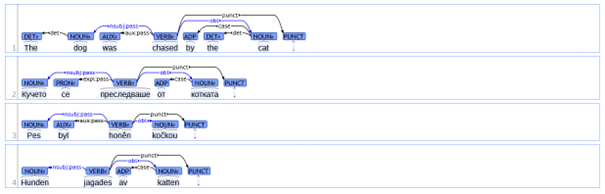


Source: https://universaldependencies.org/introduction.html
